# Vector embeddings with OpenAI

## Vector là gì

- Hiểu một cách đơn giản, vector là biểu diễn dưới dạng dãy số của dữ liệu (văn bản, hình ảnh, âm thanh) để huận tiện cho máy tính xử lý, tìm kiếm.
- Vector có thể được ứng dụng vào các tác vụ như tìm kiếm văn bản, tìm kiếm hình ảnh, hệ thống nhận dạng khuôn mặt, vân tay...
- Vector được tạo ra nhờ mô hình deep learning đã được huấn luyện

Ví dụ sau đây chuyển 1 một văn bản trở thành dạng vector với mô hình text-embedding-ada-002, sử dụng AzureOpenAI sdk

In [86]:
import os
import dotenv
import openai

dotenv.load_dotenv()
AZURE_OPENAI_SERVICE = os.getenv("AZURE_OPENAI_SERVICE")
# AZURE
AZURE_OPENAI_EMBEDDING_DEPLOYMENT = os.getenv("AZURE_OPENAI_EMBEDDING_DEPLOYMENT")

openai_client = openai.AzureOpenAI(
    api_version="2024-06-01",
    azure_endpoint=f"https://{AZURE_OPENAI_SERVICE}.openai.azure.com")


In [87]:
def get_embedding(sentence:str):
    response = openai_client.embeddings.create(model=AZURE_OPENAI_EMBEDDING_DEPLOYMENT, input=sentence)
    vector = response.data[0].embedding
    return vector

In [88]:
sentence = "A dog just walked past my house and yipped yipped like a Martian"
vector = get_embedding(sentence)

In [3]:
vector

[-0.01423619594424963,
 -0.0071890209801495075,
 -0.02720867283642292,
 0.012327720411121845,
 -0.0037782657891511917,
 0.022089315578341484,
 0.009626195766031742,
 -0.018027357757091522,
 -0.0006479790317825973,
 -0.025016503408551216,
 0.01601572148501873,
 -0.0027934021782130003,
 0.01059332862496376,
 -0.005583580583333969,
 0.011515328660607338,
 0.011657175607979298,
 0.023946210741996765,
 0.01013555284589529,
 0.016699161380529404,
 0.02705393172800541,
 -0.011025315150618553,
 0.022463273257017136,
 0.019303971901535988,
 -0.023546462878584862,
 -0.015409651212394238,
 -0.002952979179099202,
 0.021392978727817535,
 -0.015074377879500389,
 0.0009292535251006484,
 -0.009465007111430168,
 0.014081454835832119,
 -0.005967210046947002,
 -0.03871110454201698,
 0.005361140239983797,
 -0.02168956771492958,
 -0.020722433924674988,
 0.016531525179743767,
 -0.010748070664703846,
 0.009323161095380783,
 -0.023198293522000313,
 -0.005083895288407803,
 0.007479161024093628,
 0.005751216784

In [94]:
print("Vector có số chiều:", len(vector))

Vector có số chiều: 1536


Lưu ý: Số chiều của vector có thể khác nhau tùy theo mô hình mà chúng ta sử dụng.

Ví dụ với:
- text-embedding-ada-002 là 1536
- text-embedding-3-large là 3072

## Cosine Similarity
- Cosine similarity là một phép đo thường được sử dụng để đo mức độ tương tự giữa 2 vector
$$
\text{cosine similarity} = \frac{A \cdot B}{\|A\| \|B\|}
$$
- Được tính bằng dot product của 2 vector chia cho tích độ dài của 2 vectors

In [41]:
import numpy as np
import pandas as pd

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

- Giá trị của cosine similarity nằm trong khoảng giá trị từ -1 tới 1
    - 1: Hai vector hoàn toàn giống nhau
    - 0: Hai vector vuông góc (không tương đồng)
    - -1: Hai vector hoàn toàn trái ngược

Ví dụ 2 vector gần giống nhau

In [85]:
# Định nghĩa các vector
A = np.array([0.5, 0.2])
B = np.array([0.4, 0.3])
print("Cosine similarity: ", cosine_similarity(A, B)) 

Cosine similarity:  0.9656157585206696


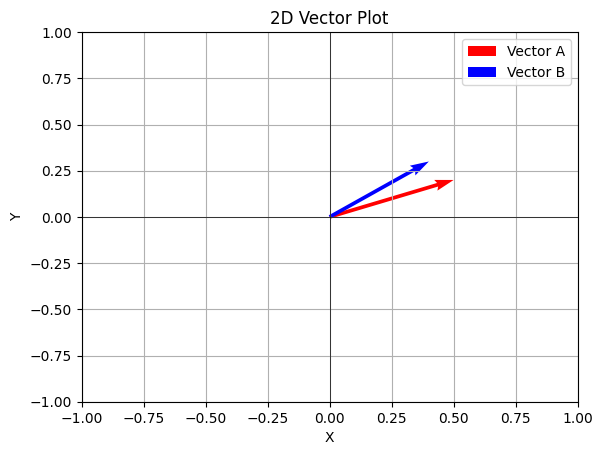

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo figure và axis
fig, ax = plt.subplots()

# Vẽ các vector
ax.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
ax.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')

# Đặt giới hạn
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Thêm nhãn
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Vector Plot')
ax.legend()

# Hiển thị đồ thị
plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()


Ví dụ 2 vector khác nhau

Cosine similarity:  -0.8553596074489094


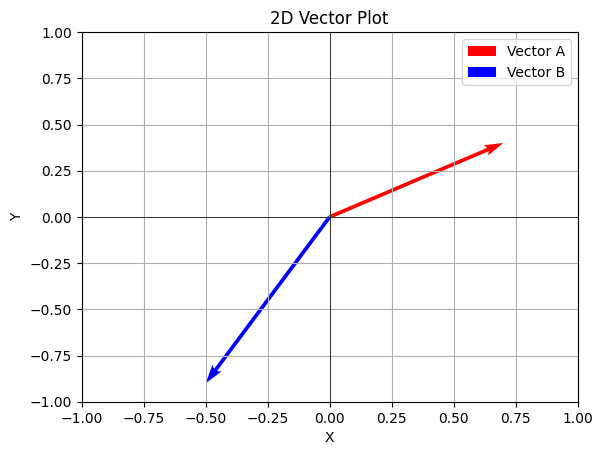

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa các vector khác nhau
A = np.array([0.7, 0.4])
B = np.array([-0.5, -0.9])
print("Cosine similarity: ", cosine_similarity(A, B)) 
# Tạo figure và axis
fig, ax = plt.subplots()

# Vẽ các vector
ax.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
ax.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')

# Đặt giới hạn
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Thêm nhãn
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Vector Plot')
ax.legend()

# Hiển thị đồ thị
plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

### Ví dụ khác

In [5]:


sentences1 = ['The new movie is awesome',
             'The new movie is awesome',
             'The new movie is awesome']

sentences2 = ['The new movie is awesome',
              'This recent movie is so good',
              'djkshsjdkhfsjdfkhsd']

def get_embeddings(sentences):
    embeddings_response = openai_client.embeddings.create(model=AZURE_OPENAI_EMBEDDING_DEPLOYMENT, input=sentences)
    return [embedding_object.embedding for embedding_object in embeddings_response.data]

embeddings1 = get_embeddings(sentences1)
embeddings2 = get_embeddings(sentences2)

for i in range(len(sentences1)):
    print(f"{sentences1[i]} \t\t {sentences2[i]} \t\t Score: {cosine_similarity(embeddings1[i], embeddings2[i]):.4f}")

The new movie is awesome 		 The new movie is awesome 		 Score: 1.0000
The new movie is awesome 		 This recent movie is so good 		 Score: 0.9191
The new movie is awesome 		 djkshsjdkhfsjdfkhsd 		 Score: 0.7461


## Tìm kiếm vector

Giả sử chúng ta có danh sách các vectors của tên các bộ phim trong file openai_movies.json. 
Chúng ta cần xây dựng chương trình để tìm kiếm dựa vào tên phim do người dùng nhập vào.

In [97]:
import json

# Load in vectors for movie titles
with open('../data/openai_movies.json') as json_file:
    movie_vectors = json.load(json_file)

print("Số lượng phim trong file:", len(movie_vectors)) 

Số lượng phim trong file: 573


Các bước thực hiện sẽ là:
1. Với tên phim cần tìm (input query), chuyển sang dạng vector (query vector)
2. Với mỗi vector trong kho dữ liệu (json file), tính toán mức độ tương đồng của query vector với từng vector đó
3. Chọn ra vector giống nhất

In [9]:
# Compute vector for query
query = "101 Dalmations"

embeddings_response = openai_client.embeddings.create(model=AZURE_OPENAI_EMBEDDING_DEPLOYMENT, input=[query])
vector = embeddings_response.data[0].embedding

# Compute cosine similarity between query and each movie title
scores = []
for movie in movie_vectors:
    scores.append((movie, cosine_similarity(vector, movie_vectors[movie])))

# Display the top 10 results
df = pd.DataFrame(scores, columns=['Movie', 'Score'])
df = df.sort_values('Score', ascending=False)
df.head(10)

,Movie,Score
8,101 Dalmatians,0.979849
335,102 Dalmatians,0.948893
28,The Fox and the Hound,0.861510
6,Lady and the Tramp,0.851573
48,The Great Mouse Detective,0.841710
468,Beverly Hills Chihuahua,0.840783
15,The Aristocats,0.839970
558,The Good Dinosaur,0.838789
135,Aladdin,0.837235
391,Teacher's Pet: The Movie,0.836816


## Vấn đề performance

Giả sử số lượng phim trong dữ liệu không phải là 573 nữa mà lên tới hàng triệu phim thì việc tìm kiếm tuần tự như trên sẽ không còn hoạt động tốt.

Cần phải có một cơ chế tốt hơn để tìm kiếm với dữ liệu lớn.